# 6.4: KLM Report

The calculation and description of the task completion times for the 4 Tasks as well as the visualizations have been done by Michael Meckl. The experiment design and it's implementation have been done by Johannes Lorper.

## Part 1: Estimate task completion time for tasks

### Tasks:

* Task 1: adding the numbers from 1 to 20 using only the mouse

* Task 2: adding the numbers from 1 to 20 using only the keyboard

* Task 3: calculating the result of (3² + 4²) ∗ 15.2 using only the mouse

* Task 4: calculating the result of (3² + 4²) ∗ 15.2 using only the keyboard

###### Assumptions for the tasks above:
The calculator is already opened and focused and the user's hand is already on the correct input device for the first action (either mouse or keyboard)

In [1]:
# %load_ext pycodestyle_magic
# %pycodestyle_on

In [2]:
# import the klm calculator
from klm import calculate_klm

In [3]:
# specify the files with klm operators for each task

file_task1 = "./klm_tasks/task1.txt"
file_task2 = "./klm_tasks/task2.txt"
file_task3 = "./klm_tasks/task3.txt"
file_task4 = "./klm_tasks/task4.txt"

In [4]:
# and calculate their task completion times with the imported function
task_completion_times = dict()

for task_number, task_file in enumerate([file_task1, file_task2, file_task3, file_task4], start=0):
    print(f"\nPredicted task completion time for task {task_number}:")
    times = calculate_klm(task_file)
    task_completion_times[task_number] = times


Predicted task completion time for task 0:
Input operators were: PBBPBB16P32BPBBPBBPBB30P60B
Predicted task completion time for the given operators using custom klm values: 44.064 seconds.
Predicted task completion time for the given operators using default klm values: 66.300 seconds.

Predicted task completion time for task 1:
Input operators were: 18K27KKKKK
Predicted task completion time for the given operators using custom klm values: 10.584 seconds.
Predicted task completion time for the given operators using default klm values: 9.800 seconds.

Predicted task completion time for task 2:
Input operators were: PBB7P14BPBB5P10BPBB
Predicted task completion time for the given operators using custom klm values: 12.960 seconds.
Predicted task completion time for the given operators using default klm values: 19.500 seconds.

Predicted task completion time for task 3:
Input operators were: 2K4KK4K2K6K2K
Predicted task completion time for the given operators using custom klm values: 4.536

## Part 2: KLM Experiment

### Goal

The goal of this study was to compare actual task completions times from participants with the task completion times based on the KLM-Model and the operators fro Card et al. [1] and Kieras [2]. Therefore, we designed 4 tasks which the user had to complete and logged the times he needed. We also calculated the task time the klm-model expected by using its default klm-values and our own klm-values (which we retrieved from another test), for the given tasks.


### Experiment Design

We used a within-subjects design with four conditions/tasks. The tasks were counterbalanced for each participant with a balanced latin square to migitate learning effects.

The participant was asked to only use 1 hand during the whole experiment so that he couldn't perform some tasks with keyboard and mouse at the same time. At the beginning, the user was shown the task instruction on the screen. He could take all the time he needed to understand the task. Below the instruction was a "start"-button. As soon as the user clicked on the button, the trial for the first task started. The user was presented with a calculator on which he could perform the given task. If the user made a mistake he could restart the task by pressing the "Clear"-button. After clicking on the "="-button or pressing enter on his keyboard, the task was finished and the next task instruction was displayed, if there was another task for the current participant.

The 4 tasks where:

- adding the numbers from 1 to 20 using only the mouse
- adding the numbers from 1 to 20 using only the keyboard
- calculating the result of (3*3 + 4*4) ∗ 15.2 using only the mouse.
- calculating the result of (3*3 + 4*4) ∗ 15.2 using only the keyboard.

We logged the values `[timeStamp,eventType,isMouse,klmId,argument]` of the following events:
- Input events:
    - mouseMove: every time the mouse was moved over a new button
    - mouseClick: every time the user clicked on a button with his mouse
    - keystroke: all keystrokes that were allowed in the calculator
- Task events (isMouse, klmId were empty, argument was the current task-identifier):
    - task_started: when the participant pressed the "start"-button
    - task_restarted: when  the participant clicked the "clear"-button
    - task_finished: when the participant clicked the "="-button or pressed enter on his keyboard



Our dependent variable was the time, which the user needed to fullfill the task which was calculated with the timestamps of the logged events. Our independent variables were the tasks the participant had to perform. As stated above the user was told to only use 1 hand so we could control that he wouldn't use 1 or both hands" for some tasks which would have confounded the results. As another control variable we instructed the user to only use a mouse and not a touchpad for all the pointing tasks so our results would be comparable.

### Limitations
A possible confounding variable that we didn't control for was the fact that the task description was not shown during the task, so the participant had to remember it.


[1] Card, S. K., Moran, T. P., & Newell, A. (1980). The keystroke-level model for user performance time with interactive systems. Communications of the ACM, 23(7), 396-410.

[2] Kieras, D. (2001). Using the keystroke-level model to estimate execution times. University of Michigan, 555.

### Participants
The study was conducted by 8 participants ranging in age from 22 to 27 years (m = 24,5, sd = 2,5). All participants were male and studied media informatics at the University of Regensburg.

## Pre-processing

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict

In [6]:
# Create a pandas dataframe with the task completion times above
times_df = pd.DataFrame.from_dict(task_completion_times, orient='index', 
                                  columns=['task_time_default_in_s', 'task_time_custom_in_s']).reset_index()
times_df.rename(columns={times_df.columns[0]:'task_id'}, inplace = True)
times_df.head()

,task_id,task_time_default_in_s,task_time_custom_in_s
0,0,66.3,44.064
1,1,9.8,10.584
2,2,19.5,12.960
3,3,4.2,4.536


In [7]:
# read in actual task completion times in the experiment
current_task_start_time = 0
actual_task_times = defaultdict(list, { k:[] for k in ('0','1','2', '3') })

# iterate over all participants
for i in range(8):
    log = pd.read_csv(f"calculator_experiment_p_{i}.csv")
    for idx, val in log.iterrows():
        if log.iloc[idx]['eventType'] == 'task_started' or log.iloc[idx]['eventType'] == 'task_restarted':
            # idx+1 as we start measuring the time with the first event the user triggered after starting the task
            current_task_start_time = log.iloc[idx+1]['timeStamp']
        elif log.iloc[idx]['eventType'] == 'task_finished':
            task_id = log.iloc[idx]['argument']
            actual_task_times[task_id].append(log.iloc[idx]['timeStamp'] - current_task_start_time)

In [8]:
# convert to pandas dataframe
actual_times_df = pd.DataFrame.from_dict(actual_task_times, orient='index').reset_index()
actual_times_df.rename(columns={actual_times_df.columns[0]:'task_id'}, inplace = True)
actual_times_df

,task_id,0,1,2,3,4,5,6,7
0,0,19.595232,20.719191,20.083575,20.638578,28.158820,28.222828,27.918863,28.309001
1,1,12.327166,10.929437,11.564562,10.992928,19.434556,17.920175,16.911010,18.947040
2,2,7.346711,7.947376,7.347708,8.576391,12.904812,10.399560,9.913563,9.886140
3,3,5.952444,6.744643,5.683362,6.346666,9.235302,7.525145,8.517506,7.929211


In [9]:
# pd.concat([times_df, actual_times_df], axis=1, join="inner")

In [10]:
# task_id is a string, so it has to be converted to an int first before merging
actual_times_df['task_id'] = actual_times_df['task_id'].astype(int)
merged_df = times_df.merge(actual_times_df, on="task_id")
merged_df

,task_id,task_time_default_in_s,task_time_custom_in_s,0,1,2,3,4,5,6,7
0,0,66.3,44.064,19.595232,20.719191,20.083575,20.638578,28.158820,28.222828,27.918863,28.309001
1,1,9.8,10.584,12.327166,10.929437,11.564562,10.992928,19.434556,17.920175,16.911010,18.947040
2,2,19.5,12.960,7.346711,7.947376,7.347708,8.576391,12.904812,10.399560,9.913563,9.886140
3,3,4.2,4.536,5.952444,6.744643,5.683362,6.346666,9.235302,7.525145,8.517506,7.929211


In [11]:
merged_df_updated = pd.melt(merged_df, id_vars=['task_id', 'task_time_default_in_s', 'task_time_custom_in_s'], 
                         value_vars=[0, 1, 2, 3, 4, 5, 6, 7], 
                         var_name='participant', value_name='task_time_actual_in_s')
merged_df_updated

,task_id,task_time_default_in_s,task_time_custom_in_s,participant,task_time_actual_in_s
0,0,66.3,44.064,0,19.595232
1,1,9.8,10.584,0,12.327166
2,2,19.5,12.960,0,7.346711
3,3,4.2,4.536,0,5.952444
4,0,66.3,44.064,1,20.719191
5,1,9.8,10.584,1,10.929437
6,2,19.5,12.960,1,7.947376
7,3,4.2,4.536,1,6.744643
8,0,66.3,44.064,2,20.083575
9,1,9.8,10.584,2,11.564562


In [12]:
# remove participant column
merged_df_updated.drop(['participant'], axis=1)

# rename some columns
merged_df_updated.rename(columns={'task_time_default_in_s':'klm_default', 
                               'task_time_custom_in_s': 'klm_custom', 
                               'task_time_actual_in_s': 'klm_actual'
                              }, inplace = True)
# and make everything long format
merged_df_long = pd.melt(merged_df_updated, id_vars=['task_id'], 
                         value_vars=['klm_default', 'klm_custom', 'klm_actual'], 
                         var_name='time_type', value_name='time_in_s')
merged_df_long

,task_id,time_type,time_in_s
0,0,klm_default,66.300000
1,1,klm_default,9.800000
2,2,klm_default,19.500000
3,3,klm_default,4.200000
4,0,klm_default,66.300000
...,...,...,...
91,3,klm_actual,8.517506
92,0,klm_actual,28.309001
93,1,klm_actual,18.947040
94,2,klm_actual,9.886140


## Visualizations
Comparison of the two estimates for each task with the actual task completion times

Text(0.5, 0.98, 'Task times in seconds per task and klm estimation type')

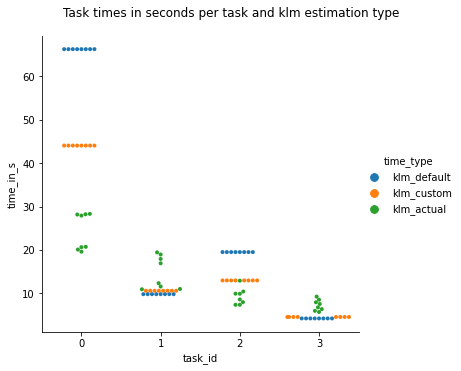

In [21]:
plot = sns.catplot(x="task_id", y="time_in_s", hue="time_type", kind="swarm", 
                   s=4, data=merged_df_long)

plot.fig.subplots_adjust(top=0.9)  # add some space between plot and title
plot.fig.suptitle('Task times in seconds per task and klm estimation type')

Text(0.5, 0.98, 'Task times in seconds per task and klm estimation type')

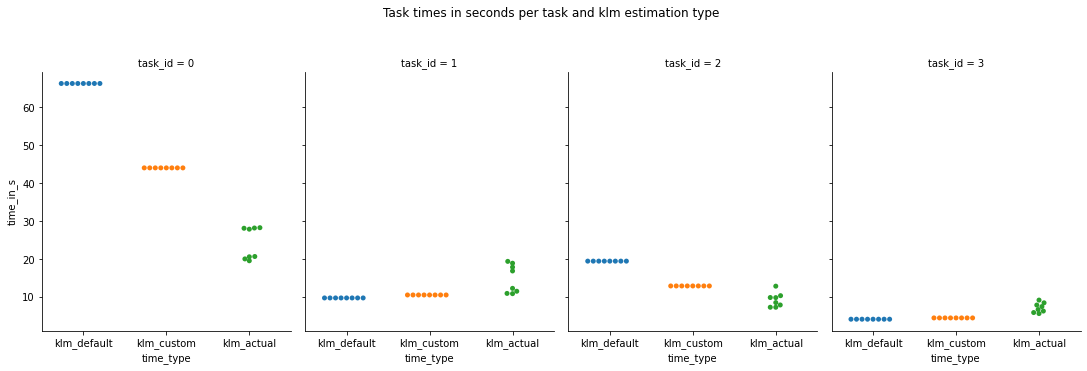

In [23]:
# almost exactly the same plot as above, but splitted into columns for better readability
sns_plot = sns.catplot(data=merged_df_long,
            x="time_type", y="time_in_s", hue="time_type",
            col="task_id", aspect=.75,
            kind="swarm")
sns_plot.fig.subplots_adjust(top=0.8)
sns_plot.fig.suptitle('Task times in seconds per task and klm estimation type')

Text(0.5, 0.98, 'Task times in seconds per klm estimation type')

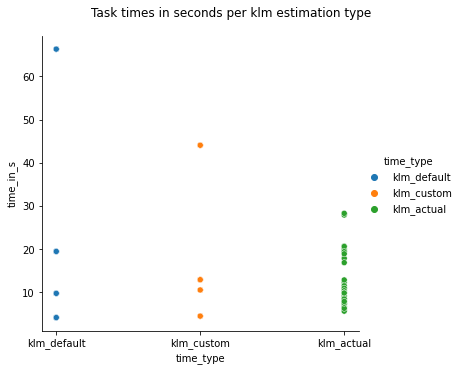

In [24]:
rp = sns.relplot(data=merged_df_long, x='time_type', y='time_in_s', hue='time_type', kind='scatter')
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Task times in seconds per klm estimation type')

In [16]:
# sns.stripplot(x="task_id", y="time_in_s", hue="time_type", data=merged_df_long)

Text(0.5, 0.98, 'Task time in seconds per klm estimation type split by task')

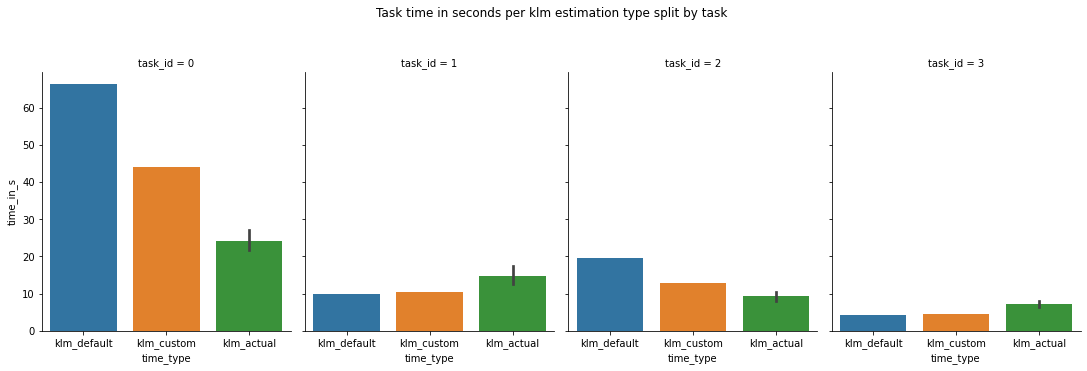

In [30]:
cp = sns.catplot(data=merged_df_long,
            x="time_type", y="time_in_s", hue="time_type",
            col="task_id", aspect=.75, dodge=False,
            kind="bar")
cp.fig.subplots_adjust(top=0.8)
cp.fig.suptitle("Task time in seconds per klm estimation type split by task")

Text(0.5, 1.0, 'Time in seconds per task sorted by klm estimation type')

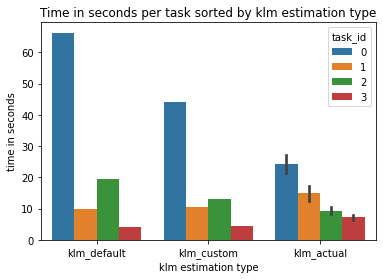

In [28]:
ax = plt.axes()
sns.barplot(data=merged_df_long, x="time_type", y="time_in_s", hue="task_id", ax = ax, dodge = True)
ax.set_xlabel("klm estimation type")
ax.set_ylabel("time in seconds")
ax.set_title("Time in seconds per task sorted by klm estimation type")

Text(0.5, 1.0, 'Task time in seconds needed per klm estimation type')

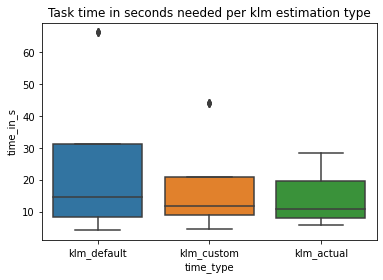

In [33]:
boxplot = sns.boxplot(x="time_type", y="time_in_s", data=merged_df_long)
boxplot.set_title("Task time in seconds needed per klm estimation type")

In [20]:
# sns.lmplot(x="task_id", y="time_in_s", hue="time_type", data=merged_df_long)

## Results

The plots show that overall our actual measured task times are quite similar to the ones we estimated during Task 6.2 while the default task time estimations (i.e. the ones from Card et al. (1980) and Kieras (2001)) differed a bit more for all tasks, especially in the first task. The reason for this is that although most of our own estimated task times are all in all quite similar to the ones in the literature, pointing was a lot faster in our estimation in 6.2. As the pointing operator is used a lot in the first task, this difference does make sense.

The boxplot above also shows that the task times vary more when using the klm time estimates as defined in the literature and that the mean of these values is slightly higher than in our custom and actual task times.

In summary, our estimations in 6.2 have been proven to be quite accurate as they are nearly identical to the actual task times in our study. This could be the result of using the same participants for getting our custom klm times and the actual times per task.